In [5]:
# For data handling
import pandas as pd

# For numerical operations
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [6]:
# Load Titanic dataset from seaborn's built-in datasets
df = sns.load_dataset('titanic')

# Display the first few rows
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# Basic info about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
# Statistical summary
df.describe()



,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Count missing values per column
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
# Drop rows with missing values in 'age' and 'embarked' (for simplicity)
df = df.dropna(subset=['age', 'embarked'])


In [11]:
# Encode 'sex' column to numeric: male = 0, female = 1
df['sex'] = df['sex'].map({'male': 0, 'female': 1})


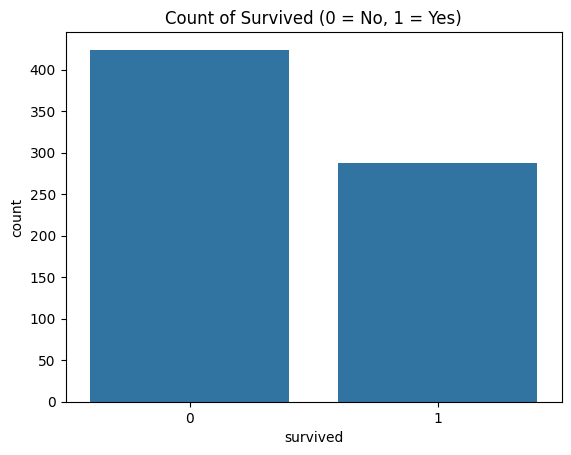

In [12]:
# Plot survival count
sns.countplot(x='survived', data=df)
plt.title("Count of Survived (0 = No, 1 = Yes)")
plt.show()


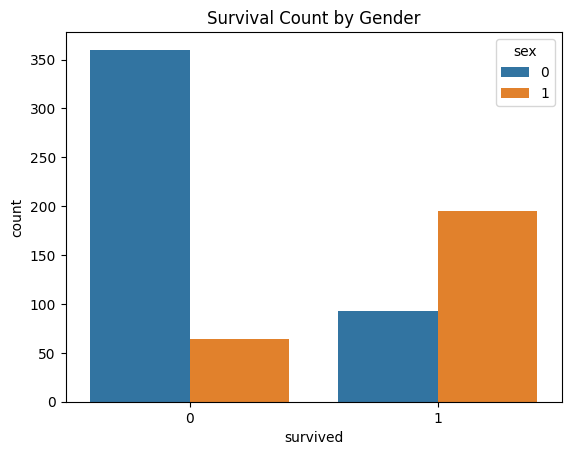

In [13]:
# Plot survival by gender
sns.countplot(x='survived', hue='sex', data=df)
plt.title("Survival Count by Gender")
plt.show()


In [14]:
# Define input features and output label
X = df[['age', 'fare', 'sex', 'pclass']]  # Features
y = df['survived']                        # Target (label)


In [15]:
# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.7972027972027972


In [18]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

print("Decision Tree Accuracy:", tree_model.score(X_test, y_test))


Decision Tree Accuracy: 0.6923076923076923


In [ ]:
Exploratory Data Analysis (EDA) is the process of analyzing a dataset to understand its structure, patterns, and key characteristics before building any machine learning model. It involves summarizing the data, checking for missing or incorrect values, understanding data types, and using visualizations like graphs and charts to explore relationships and trends. EDA helps identify problems and prepares the data for better decision-making and model performance.